# ***ML Model is design for predicting diabetes in patients .Pima Indians Diabetes Database is used to train ML_model.*** 

### *Import all requried module*

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
Diabetes_data = pd.read_csv("/content/drive/MyDrive/diabetes.csv")

In [ ]:
Diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
#Checking the null vallues in the dataset
Diabetes_data.isna().sum()


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

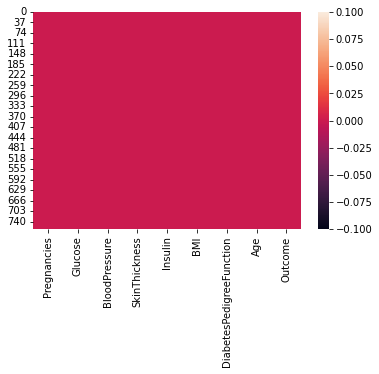

In [ ]:
sns.heatmap(Diabetes_data.isnull(),xticklabels= Diabetes_data.columns)

As we know Glucose , BloodPressure, SkinThickness ,Insulin, BMI,value can't be 0 , we have to replace all 0 values by mean.

In [ ]:
#Using SimpleImputer replace all zero values by mean repective column.

In [ ]:

Glucose_column = Diabetes_data[Diabetes_data["Glucose"] != 0]
Mean_Glucose = Glucose_column.iloc[:, 1].mean()
print("Mean value of Glucose column is ::", Mean_Glucose)

BloodPressure_column = Diabetes_data[Diabetes_data["BloodPressure"] != 0]
Mean_BloodPressure = BloodPressure_column.iloc[:, 2].mean()
print("Mean value of Blood Presure column",Mean_BloodPressure)

SkinThickness_column = Diabetes_data[Diabetes_data["SkinThickness"] != 0]
Mean_SkinThickness = SkinThickness_column.iloc[:, 3].mean()
print("Mean value of SkinThickness",Mean_SkinThickness)

Insulin_column = Diabetes_data[Diabetes_data["Insulin"] != 0]
Mean_Insulin = SkinThickness_column.iloc[:, 4].mean()
print("Mean value of Insulin column",Mean_Insulin)


Mean value of Glucose column is :: 121.6867627785059
Mean value of Blood Presure column 72.40518417462484
Mean value of SkinThickness 29.153419593345657
Mean value of Insulin column 113.28280961182995


In [ ]:
Diabetes_data["Glucose"].replace(to_replace = 0,value = np.nan ,inplace= True)
Diabetes_data["BloodPressure"].replace(to_replace = 0,value = np.nan ,inplace= True)
Diabetes_data["SkinThickness"].replace(to_replace = 0,value = np.nan ,inplace= True)
Diabetes_data["Insulin"].replace(to_replace = 0,value = np.nan ,inplace= True)

Diabetes_data["BloodPressure"].fillna(value = Mean_BloodPressure ,inplace = True)
Diabetes_data["Glucose"].fillna(value = Mean_Glucose ,inplace = True)
Diabetes_data["SkinThickness"].fillna(value = Mean_SkinThickness ,inplace = True)
Diabetes_data["Insulin"].fillna(value = Mean_Insulin ,inplace = True)


In [ ]:
Diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,113.28281,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,113.28281,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,113.28281,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.00000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.00000,43.1,2.288,33,1


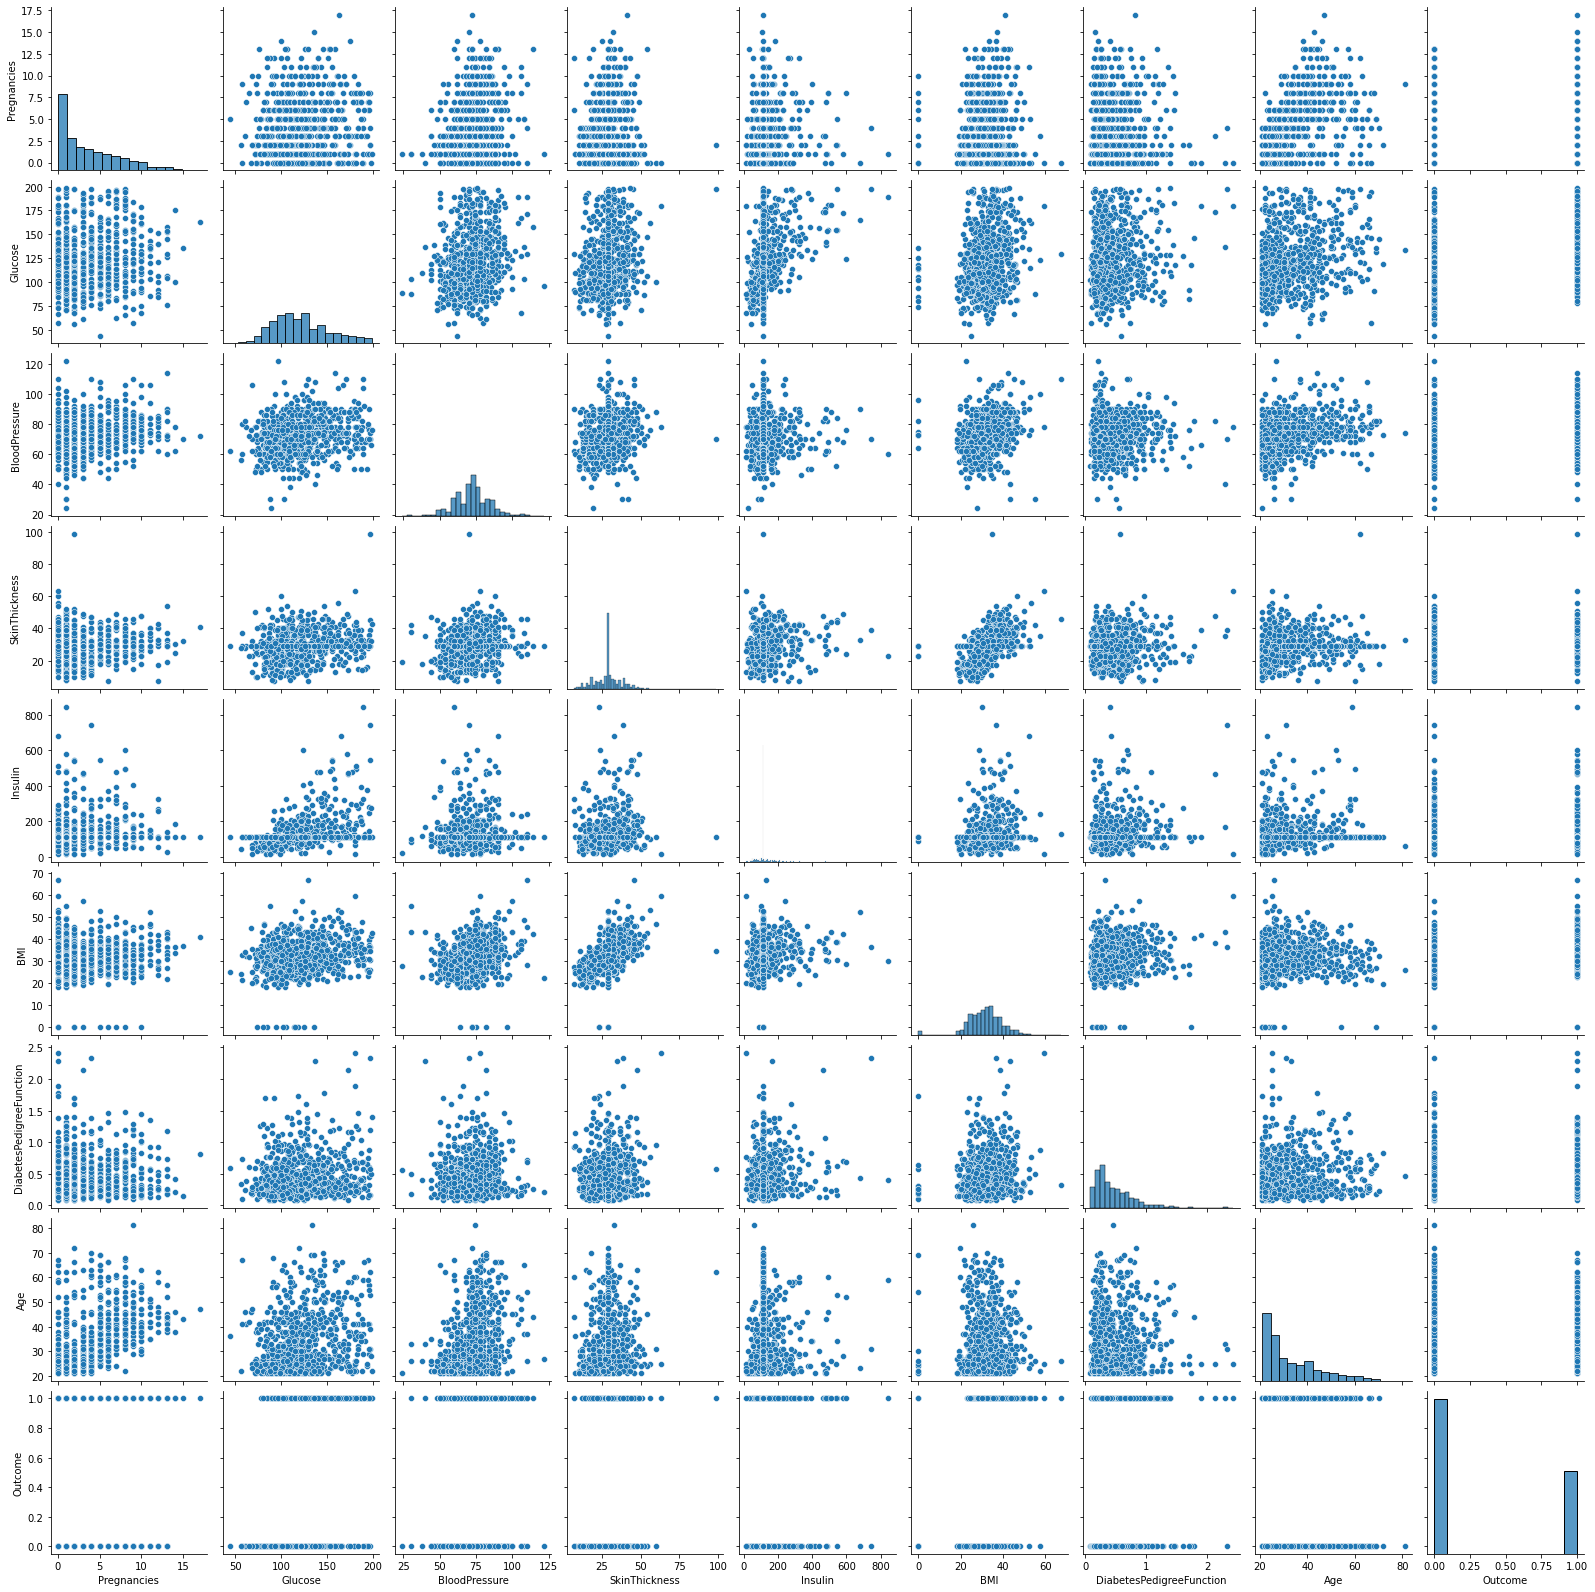

In [ ]:
sns.pairplot(Diabetes_data)

In [ ]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
Diabetes_data.iloc[:,:-1] = std.fit_transform(Diabetes_data.iloc[:,:-1])
Diabetes_data.iloc[:,:-1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-0.247657,0.204013,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-0.247657,-0.684422,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-0.247657,-1.103255,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-0.467900,-0.494043,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,0.377306,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.680125,0.297376,2.145261e+00,0.514367,0.115169,-0.908682,2.532136
764,-0.547919,0.010298,-0.198965,-2.451185e-01,-0.247657,0.610154,-0.398282,-0.531023
765,0.342981,-0.022579,-0.033518,-7.004289e-01,-0.262309,-0.735190,-0.685193,-0.275760
766,-0.844885,0.141808,-1.026200,8.087936e-16,-0.247657,-0.240205,-0.371101,1.170732


In [ ]:
X = Diabetes_data.iloc[:,:-1].values
y = Diabetes_data.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X ,y,test_size= 0.25,random_state = 0)


**Logistic** **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
y_train_pred

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,

In [ ]:
X_train

array([[ 1.53084665, -1.07465235, -0.8607529 , ..., -1.20479085,
        -0.99626558, -0.0204964 ],
       [-0.84488505, -0.12121079, -1.19164676, ...,  0.165937  ,
        -0.63687146, -0.87137393],
       [-1.14185152, -1.00889776,  0.62826949, ...,  0.05170968,
         0.38996889, -0.53102292],
       ...,
       [ 0.04601433, -0.91026588, -0.6125825 , ..., -0.92556851,
        -0.97814487, -1.04154944],
       [ 2.12477957, -1.20616153,  0.13192869, ..., -0.24020459,
        -0.51908683,  0.14967911],
       [ 0.3429808 ,  0.47058053,  0.79371642, ..., -4.06047387,
         0.50775352,  3.04266271]])

In [ ]:
X_train

array([[ 1.53084665, -1.07465235, -0.8607529 , ..., -1.20479085,
        -0.99626558, -0.0204964 ],
       [-0.84488505, -0.12121079, -1.19164676, ...,  0.165937  ,
        -0.63687146, -0.87137393],
       [-1.14185152, -1.00889776,  0.62826949, ...,  0.05170968,
         0.38996889, -0.53102292],
       ...,
       [ 0.04601433, -0.91026588, -0.6125825 , ..., -0.92556851,
        -0.97814487, -1.04154944],
       [ 2.12477957, -1.20616153,  0.13192869, ..., -0.24020459,
        -0.51908683,  0.14967911],
       [ 0.3429808 ,  0.47058053,  0.79371642, ..., -4.06047387,
         0.50775352,  3.04266271]])

In [ ]:
from sklearn.metrics import accuracy_score ,confusion_matrix
print("Accuracy of training dataset is",accuracy_score(y_train_pred,y_train))
print("Accuracy of testing dataset is",accuracy_score(y_test_pred,y_test))

Accuracy of training dataset is 0.7708333333333334
Accuracy of testing dataset is 0.7916666666666666


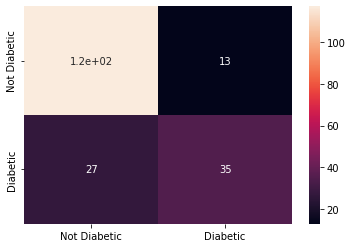

In [ ]:
sns.heatmap(confusion_matrix(y_test,y_test_pred) , annot = True, xticklabels= ["Not Diabetic", "Diabetic"],yticklabels= ["Not Diabetic", "Diabetic"] )

In [ ]:
confusion_matrix(y_test,y_test_pred) 

array([[117,  13],
       [ 27,  35]])

**Making a Predictive System** 

In [ ]:
input_data = [2,197,70,45,543,30.5,0.158,53] # ouput = 1

#convert it into array
input_data = np.array(input_data).reshape(1,-1)

#Apply Standardization
input_data[:,:] = std.fit_transform(input_data[:,:])

#Prediction of output
Prediction = model.predict(input_data)
print(Prediction)

if(Prediction == 1):
  print("Person is having Diabetes")
else:
  print("Person is not having Diabetes")

[0]
Person is not having Diabetes


**Saving the train Model**

In [ ]:
import pickle

In [ ]:
filename = "trained_model.sav"
pickle.dump(model , open(filename ,"wb"))

In [ ]:
#Loading the saved model
loaded_model = pickle.load(open("trained_model.sav","rb"))

In [ ]:
input_data = [2,197,70,45,543,30.5,0.158,53] # ouput = 1

#convert it into array
input_data = np.array(input_data).reshape(1,-1)

#Apply Standardization
input_data[:,:] = std.fit_transform(input_data[:,:])

#Prediction of output
Prediction = loaded_model.predict(input_data)

if(Prediction == 1):
  print("Person is having Diabetes")
else:
  print("Person is not having Diabetes")

Person is not having Diabetes
